# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv('spotify.csv', index_col=0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [4]:
df_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1396,0.286000,0.616,236960,0.387,0.000000,9,0.2770,-6.079,0,0.0335,81.856,4.0,0.4700,0,All in Vain,Mot
641,0.030200,0.756,256933,0.595,0.000002,1,0.1460,-6.924,1,0.0333,130.031,4.0,0.0681,1,One of Those Nights,Juicy J
1765,0.092500,0.685,257173,0.784,0.000000,9,0.3140,-4.971,1,0.1100,90.890,4.0,0.7340,0,Take Me As I Am,Wyclef Jean
1801,0.063700,0.406,224848,0.638,0.000000,9,0.1070,-6.085,0,0.1300,177.916,4.0,0.4040,0,Save My Soul,JoJo
1624,0.014400,0.507,213338,0.665,0.000000,0,0.0759,-7.598,1,0.0474,126.879,4.0,0.4060,0,Save the World - Radio Mix,Swedish House Mafia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.2110,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
1346,0.000021,0.535,203500,0.974,0.000149,10,0.2630,-3.566,0,0.1720,116.956,4.0,0.4310,0,Flag of the Beast,Emmure
1406,0.503000,0.410,256333,0.648,0.000000,7,0.2190,-4.469,1,0.0362,60.391,4.0,0.3420,0,Don't You Cry For Me,Cobi
1389,0.705000,0.894,222307,0.161,0.003300,4,0.3120,-14.311,1,0.0880,104.968,4.0,0.8180,0,장가갈 수 있을까 Can I Get Married?,Coffeeboy


In [5]:
df_test

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1423,0.00184,0.541,225427,0.609,0.000000,1,0.1790,-3.715,1,0.1270,158.314,4.0,0.298,0,She On My Dick,Rick Ross
356,0.00855,0.293,202160,0.792,0.011100,7,0.1330,-3.747,1,0.0363,161.933,4.0,0.696,1,Grinder,Gary Clark Jr.
854,0.93400,0.440,254360,0.433,0.811000,2,0.2730,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
1445,0.09870,0.443,210884,0.727,0.000009,0,0.1180,-5.171,0,0.0984,74.827,4.0,0.423,0,Freesol (feat. Skyler Stonestreet),Seven Lions
1647,0.00346,0.723,176561,0.809,0.001230,7,0.5650,-3.081,0,0.0625,98.007,4.0,0.271,0,Lean On (feat. MØ & DJ Snake),Major Lazer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.83100,0.400,327773,0.337,0.000000,2,0.0934,-7.404,1,0.0355,108.196,5.0,0.354,0,Almost Is Never Enough,Nathan Sykes
670,0.02350,0.847,246100,0.713,0.000000,6,0.3310,-3.890,0,0.2410,132.063,4.0,0.338,1,VERSACE,Flap Jack
1216,0.05330,0.441,225160,0.870,0.000004,2,0.0936,-4.845,1,0.0570,134.469,4.0,0.281,0,A Dustland Fairytale,The Killers
698,0.00525,0.700,307467,0.675,0.000000,2,0.6570,-6.362,1,0.1490,124.882,4.0,0.227,1,No New Friends - SFTB Remix,DJ Khaled


1512 training samples, 505 test samples

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [6]:
description = df_train.describe()
range_row = description.loc['max'] - description.loc['min']
range_row.name = 'range'
description.append([range_row])

C:\Users\imdav\AppData\Local\Temp\ipykernel_24932\265798659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  description.append([range_row])


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.185337,0.617565,247606.240741,0.682022,0.139041,5.406746,0.189816,-7.089587,0.619048,0.090843,121.978905,3.964947,0.501758,0.511243
std,0.257866,0.163086,81841.143743,0.211498,0.279536,3.635880,0.154115,3.841885,0.485782,0.086574,27.121977,0.253555,0.246599,0.500039
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009460,0.512000,200072.000000,0.564000,0.000000,2.000000,0.092200,-8.389000,0.000000,0.037375,100.500750,4.000000,0.298750,0.000000
50%,0.063700,0.629500,230100.000000,0.713500,0.000076,6.000000,0.127000,-6.239000,1.000000,0.055050,121.974000,4.000000,0.501000,1.000000
75%,0.253000,0.738250,274041.750000,0.847250,0.061100,9.000000,0.243000,-4.756000,1.000000,0.107000,137.938250,4.000000,0.694000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000
range,0.994995,0.862000,833918.000000,0.982200,0.976000,11.000000,0.950200,32.790000,1.000000,0.792900,171.472000,4.000000,0.956100,1.000000


speechiness has the smallest range

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [7]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

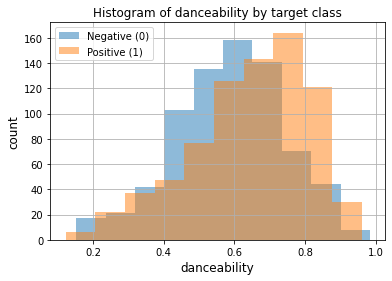

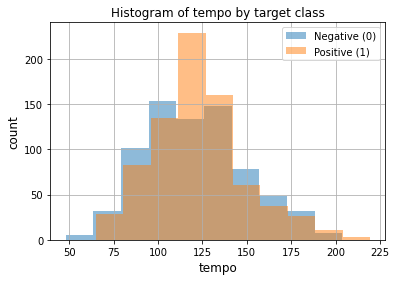

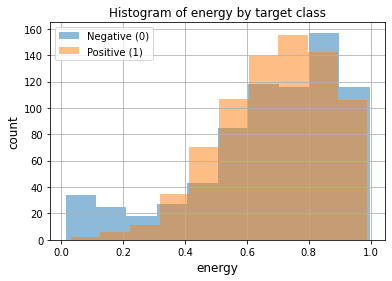

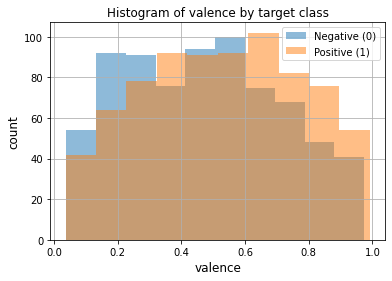

In [8]:
features = ['danceability', 'tempo', 'energy', 'valence']
for feature in features:
    ax = negative_examples.hist(column=feature, alpha=0.5)
    positive_examples.hist(column=feature, ax=ax, alpha= 0.5)
    plt.title(f'Histogram of {feature} by target class', fontsize='12')
    plt.xlabel(feature, fontsize='12')
    plt.ylabel('count', fontsize='12')
    plt.legend(['Negative (0)', 'Positive (1)'])
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

If danceability > 0.7, predict 1, and predict 0 otherwise

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



That would indicate to me that that feature is not very useful for predicting the target class.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [9]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

I'm sure there is some usefulness in using the artist to predict whether the user likes the song, as someone might be likely to like many songs by the same artist, or dislike all the songs of an artist. However, the difficulty in using this in the model comes from introducing new artists. If the model has seen that I like Nirvana and dislike the Beatles (fictional example), it won't know what to predict when I give it a song by The Rolling Stones, as the actual string has no impact on whether I like it, but is in fact the band represented by the string that is influential.

For the title, this could also be complex, as the title could suggest a subject matter that the listener may be inclined to enjoy, however it makes no indication as to genre or style of the song, which would also be very important in influencing whether the listener would enjoy the song.

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [10]:
X_test = df_test.drop(columns=["song_title", "artist", "target"])
y_test = df_test["target"]

X_train = df_train.drop(columns=["song_title", "artist", "target"])
y_train = df_train["target"]

# adapted from lecture 2
model = DecisionTreeClassifier() # Create a decision tree
model.fit(X_train, y_train) # Fit a decision tree
model.score(X_train, y_train) # Assess the model


0.9993386243386243

In [11]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1396,0.286000,0.616,236960,0.387,0.000000,9,0.2770,-6.079,0,0.0335,81.856,4.0,0.4700
641,0.030200,0.756,256933,0.595,0.000002,1,0.1460,-6.924,1,0.0333,130.031,4.0,0.0681
1765,0.092500,0.685,257173,0.784,0.000000,9,0.3140,-4.971,1,0.1100,90.890,4.0,0.7340
1801,0.063700,0.406,224848,0.638,0.000000,9,0.1070,-6.085,0,0.1300,177.916,4.0,0.4040
1624,0.014400,0.507,213338,0.665,0.000000,0,0.0759,-7.598,1,0.0474,126.879,4.0,0.4060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.2110
1346,0.000021,0.535,203500,0.974,0.000149,10,0.2630,-3.566,0,0.1720,116.956,4.0,0.4310
1406,0.503000,0.410,256333,0.648,0.000000,7,0.2190,-4.469,1,0.0362,60.391,4.0,0.3420
1389,0.705000,0.894,222307,0.161,0.003300,4,0.3120,-14.311,1,0.0880,104.968,4.0,0.8180


In [12]:
y_train

1396    0
641     1
1765    0
1801    0
1624    0
       ..
2012    0
1346    0
1406    0
1389    0
1534    0
Name: target, Length: 1512, dtype: int64

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [13]:
model.predict(X_train.iloc[[0]])

array([0], dtype=int64)

In [14]:
y_train.iloc[[0]]

1396    0
Name: target, dtype: int64

The prediction is correct

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [15]:
cross_val_score_result = np.mean(cross_val_score(model, X_train, y_train, cv=10))
print('Cross Val Score: ', cross_val_score_result)

Cross Val Score:  0.6852126176368073


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [16]:
cross_val = cross_validate(model, X_train, y_train, return_train_score=True, cv=10)
print('Cross Val Score: ', np.mean(cross_val['test_score']), '\nTrain Score: ', np.mean(cross_val['train_score']))

Cross Val Score:  0.679252352736145 
Train Score:  0.9994121428880149


Cross validation score is very similar to previous part.

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Train score is much higher than cross val score. Thus, the model is overfitting.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [17]:
cross_val_df = pd.DataFrame(cross_val)
cross_val_df

,fit_time,score_time,test_score,train_score
0,0.014961,0.001995,0.664474,0.999265
1,0.011996,0.000998,0.664474,1.000000
2,0.010972,0.000995,0.682119,1.000000
3,0.010971,0.000997,0.675497,0.999265
4,0.010970,0.001001,0.655629,0.999265
5,0.011971,0.000994,0.682119,0.999265
6,0.010971,0.000998,0.662252,0.999265
7,0.011940,0.001026,0.682119,0.999265
8,0.010970,0.000997,0.708609,0.999265
9,0.010971,0.000998,0.715232,0.999265


The cross validation score from the first part fits within the range of test_scores seen during the 10 folds of cross-validation. This reinforces the trustworthiness of the cross validation.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

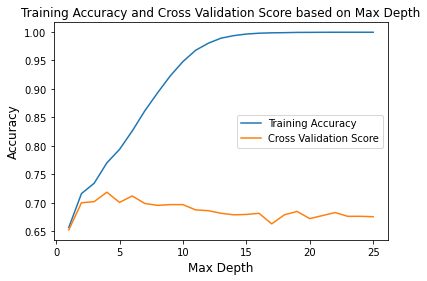

In [18]:
depths = []
trains = []
cross_vals = []
for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth=depth) 
    model.fit(X_train, y_train)
    cross = cross_validate(model, X_train, y_train, return_train_score=True, cv=10)
    # print(depth, train, cross)
    trains.append(np.mean(cross['train_score']))
    cross_vals.append(np.mean(cross['test_score']))
    depths.append(depth)
    
plt.plot(depths, trains)
plt.plot(depths, cross_vals)
plt.title('Training Accuracy and Cross Validation Score based on Max Depth')
plt.xlabel('Max Depth', fontsize='12')
plt.ylabel('Accuracy', fontsize='12')
plt.legend(['Training Accuracy', 'Cross Validation Score'])
plt.show()

Increasing max depth increases training accuracy up to a plateau, and after an initial increase, the cross validation score decreased as the max depth increases. I would select a max depth of 2 as the optimal choice, as this makes the training accuracy and cross validating most similar. I would expect this to generalize well, as this is the depth that maximizes the cross validation score, without overfitting occurring.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [19]:
# adapted from lecture 2
new_model = DecisionTreeClassifier(max_depth=2) # Create a decision tree
new_model.fit(X_train, y_train) # Fit a decision tree
new_model.score(X_train, y_train) # Assess the model
cross_val = cross_validate(new_model, X_train, y_train, return_train_score=True, cv=10)
print('Test Score: ', np.mean(cross_val['test_score']))
print('Train Score: ', np.mean(cross_val['train_score']))

Test Score:  0.7003790519344719
Train Score:  0.7164905238362795


The cross-validation score from the previous exercise is slightly smaller than this one, as well as the train score for this model being closer to the cross-val score, indicating we aren't overfitting.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

1. We would predict -1 if true, and 1 if false.
2. We would predict $$ \begin{bmatrix}-1\\-1\\-1\\1\\1\\1\end{bmatrix}.$$
This would correspond with 83% accuracy.
3. If we predict +1 if the sum of both features is even, and -1 if the sum of both features is odd, we can achieve 100% accuracy. We could also achieve this by predicting -1, if the sum of the features is 7, and +1 otherwise.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 